##Importing the necessary tools


In [87]:
import pandas as pd #Importing dataset
import numpy as np
import matplotlib.pyplot as plt #Visualisation
import seaborn as sns #Visualisation


## Data Wrangling

In [88]:
def wrangle(filepath):
  #importing datasets
  df=pd.read_csv(filepath,encoding="latin-1")

  #Droping missing values in "Ratings","Actor 3","Genre","Duration"."Rating" has 49% and "Actor 3" has 20% of missing values
  df.dropna(subset=["Rating","Actor 3","Genre","Duration"],inplace=True)

  #split Duration columns and selecting the first part,Converting dtype for duration from "Object" to float
  df["Duration"] = df["Duration"].str.split(" ",expand=True)[0].astype(float)

  #splitting "Genre" columns by "," and selecting the first part
  df["Genre"]=df["Genre"].str.split(",",expand=True)[0]

  #Replacing "(" and ")" in "Year" column and converting dtype  to Interger
  df["Year"]=df["Year"].str.replace("(","",regex=False).str.replace(")","",regex=False).astype(int)

  #Replacing ","" in "Votes" column and converting dtype  to Interger
  df["Votes"]=df["Votes"].str.replace(",","").astype(int)

  #Feature enginering
  #Creating "Counts" columns that indicates The number of times a movie name is repeated
  counts = {}  # Initialize an empty dictionary to store counts
  for i in df.index:
    value = df.loc[i, 'Name']
    if value not in counts:
      counts[value] = 1
    else:
      counts[value] += 1

  for i in df.index:
    value = df.loc[i, 'Name']
    df.loc[i, 'Counts'] = counts[value]

  #No duplicates in our data
  #Dropping Useless Columns ."Name" has 93% unique values#we will dropping this after performing some analysis
  # df.drop(columns=["Name","Counts"],inplace=True)
  return df

In [89]:
#Importing data set
df=wrangle("/content/drive/MyDrive/IMDb Movies India.csv",)

In [90]:
print('\n', '='*100, '\n')

##Explatory Data Analysis

In [91]:
#Descriptive statistics
des_stats = df.describe()

In [92]:
des_stats

,Year,Duration,Rating,Votes,Counts
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585,1.107086
std,19.741839,25.319939,1.381165,13651.503584,0.359958
min,1931.000000,21.000000,1.100000,5.000000,1.000000
25%,1983.000000,119.000000,5.000000,30.000000,1.000000
50%,2002.000000,135.000000,6.100000,131.000000,1.000000
75%,2013.000000,150.000000,6.900000,922.500000,1.000000
max,2021.000000,321.000000,10.000000,591417.000000,4.000000


Visualising The correlation


<ipython-input-93-7f41a1f5bd78>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr().abs()


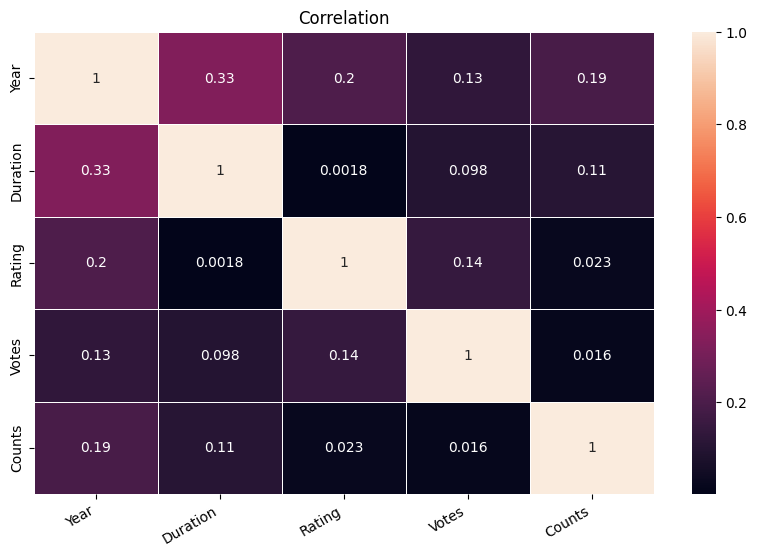

In [93]:
##Finding the correlation between variables
print("Visualising The correlation")
corr=df.corr().abs()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, vmax=1, annot=True, linewidths=.5,)
plt.title("Correlation")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

- **There is weak Coorelation between variables**



In [94]:
#1.Year with best rating
YearBestRating=df.groupby("Year")["Rating"].mean().reset_index().nlargest(10,"Rating")

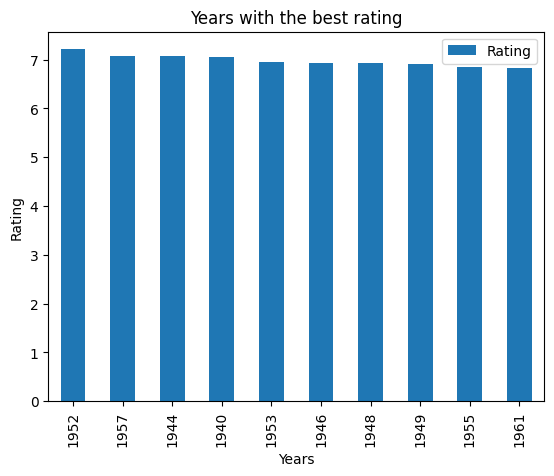

In [95]:
YearBestRating.plot(kind="bar",x="Year",title="Years with the best rating",xlabel="Years",ylabel="Rating");

- **Year with the highest rating is 1952 ,followed by 1957**

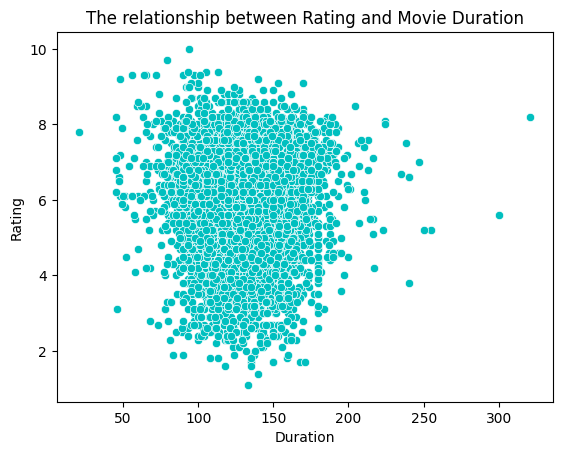

In [96]:
#2.Does length of movie have any impact with the rating?
#Plotting using scatter
sns.scatterplot(data=df,x="Duration",y="Rating",color="c");
plt.title("The relationship between Rating and Movie Duration");

-**There is no correlation.There is no pattern that can be detected between the variables**

In [97]:
#3.Top 10 movies according to rating per year and overall.
Movie_rating=df.groupby(["Name","Year"])["Rating"].mean().reset_index().nlargest(10,"Rating")

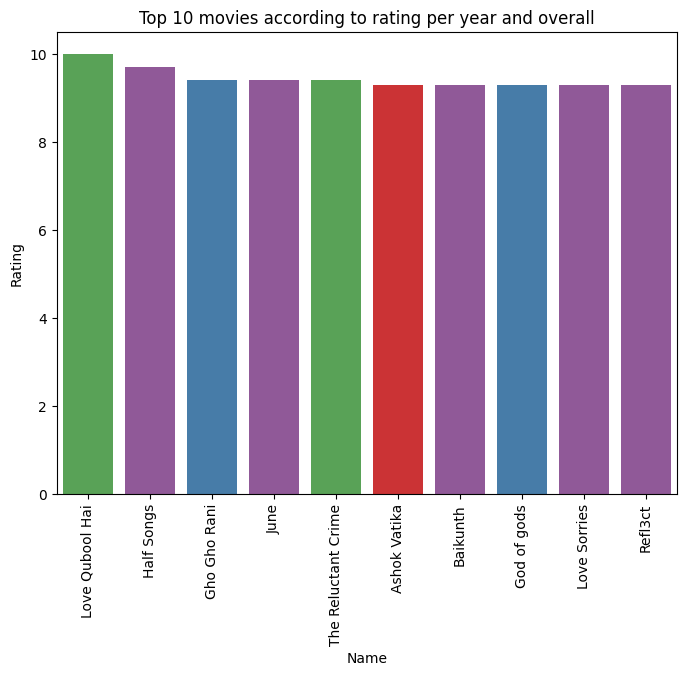

In [98]:
#create a new figure objec
plt.figure(figsize=(8, 6))
#plotting bar graph
sns.barplot(data=Movie_rating,x="Name",y="Rating",hue="Year",palette='Set1',legend=False)
plt.xticks(rotation=90)
plt.title("Top 10 movies according to rating per year and overall");

-**The best movie according to the rating per year is "Love Qubool Hai"**

In [99]:
#4.Number of popular movies released each year.
#A populer movie is movie with a rating greater 7
popular_movies = df[df['Rating'] > 7]


In [100]:
grouped_df = popular_movies.groupby('Year')['Name'].count().reset_index(name="Counts").nlargest(10, "Counts")

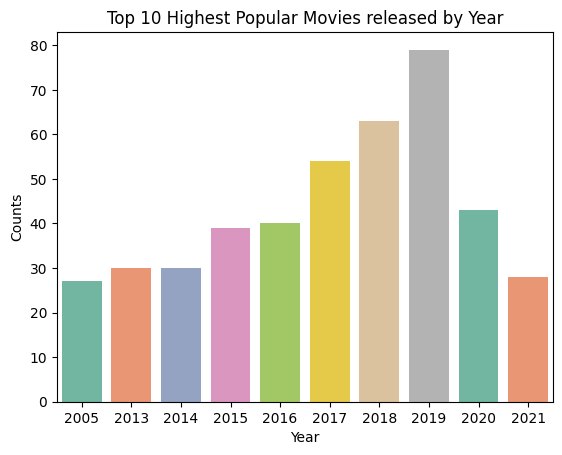

In [101]:
sns.barplot(grouped_df,x="Year",y='Counts',hue='Year',palette='Set2',legend=False);
plt.title("Top 10 Highest Popular Movies released by Year");

- **Most of the populer movies were released in between 2013 and 2021 . 2019 is the year the highest populer movies released**

In [102]:
#Based on voting which movies had the highest rating
df_most_votes_by_year=df.groupby(["Votes","Name"])["Rating"].mean().reset_index().nlargest(10,"Rating")


In [103]:
df_most_votes_by_year

,Votes,Name,Rating
20,5,Love Qubool Hai,10.0
137,7,Half Songs,9.7
812,16,The Reluctant Crime,9.4
899,18,June,9.4
1888,47,Gho Gho Rani,9.4
114,7,Ashok Vatika,9.3
1351,29,Baikunth,9.3
1623,36,Sindhustan,9.3
1866,46,God of gods,9.3
2380,79,Love Sorries,9.3


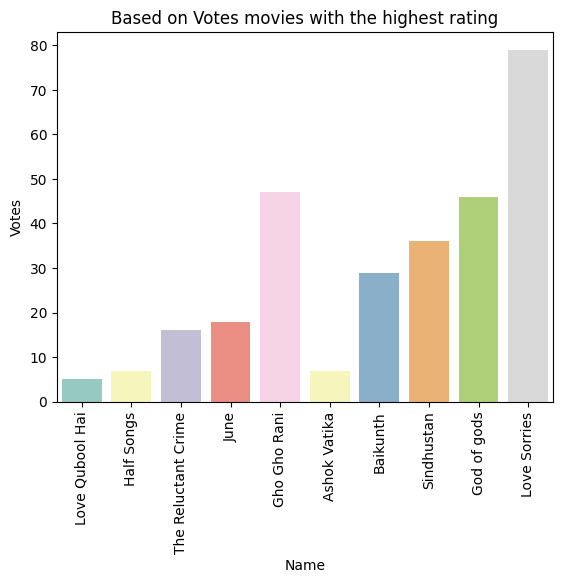

In [104]:
sns.barplot(df_most_votes_by_year,x='Name',y='Votes',hue='Votes',palette='Set3',legend=False)
plt.title("Based on Votes movies with the highest rating")
plt.xticks(rotation=90);

- **Top 10 movies with the highest  rating based on votes**

In [105]:
#6.Which director directed the most movies
director_most_movies=df.groupby("Director")["Name"].count().reset_index(name='Counts').nlargest(10,'Counts')


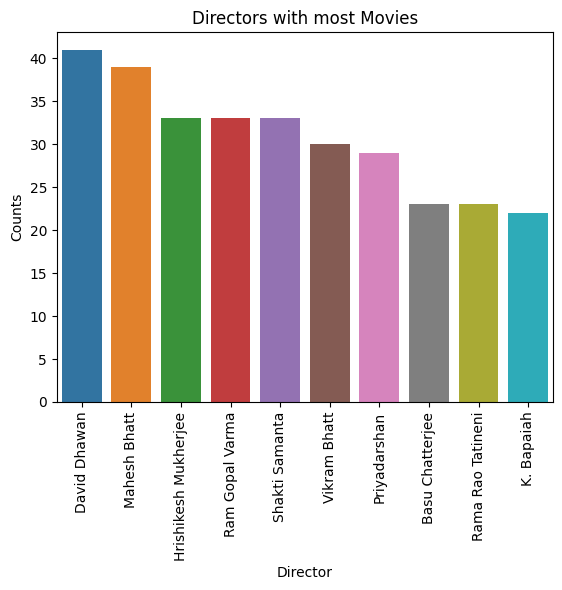

In [106]:
sns.barplot(director_most_movies,x='Director',y='Counts',hue='Director')
plt.title("Directors with most Movies")
plt.xticks(rotation=90);

- **David Dhawan is the director with the highest number of movies ,followed by Mahesh Bhatt**

In [107]:
#Dropping 'Name' and 'Counts' columns
df.drop(columns=["Name","Counts"],inplace=True)

### Univariate Analysis

In [108]:
#Selecting "Year", "Duration","Rating" for visualisation
distr=df[["Year","Duration","Rating"]]

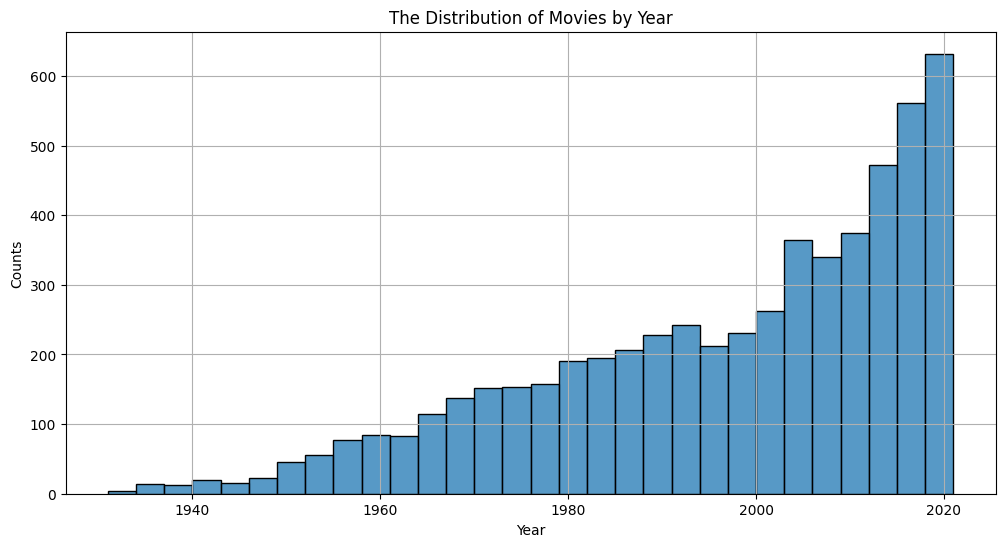

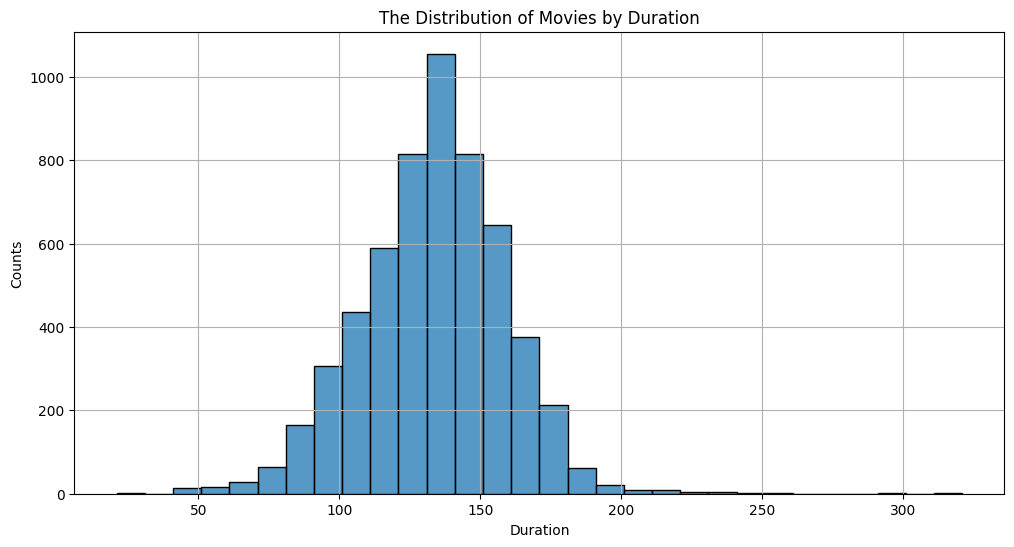

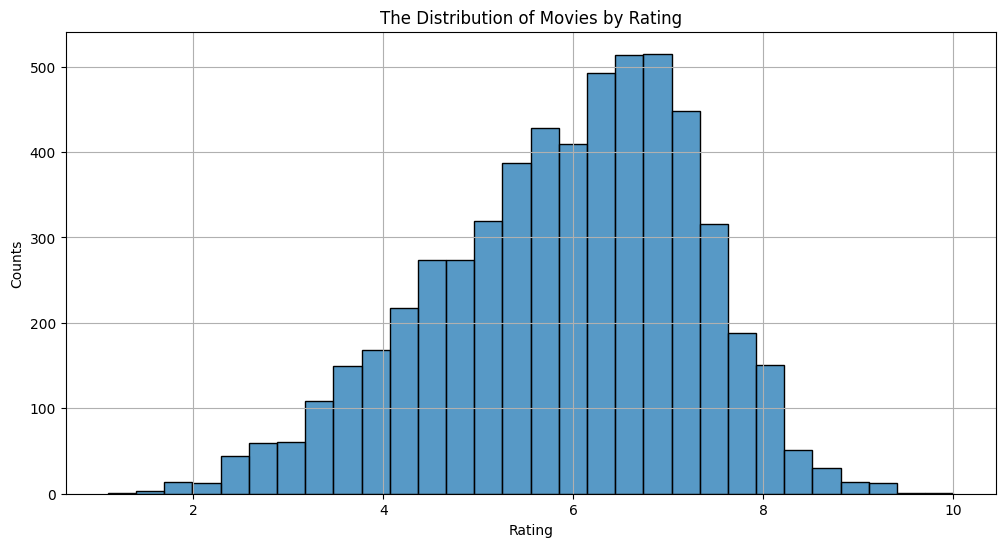

In [109]:
for col in distr:
    plt.figure(figsize=(12, 6))
    #plotting histogram
    sns.histplot(df[col],bins=30,)
    plt.title(f"The Distribution of Movies by {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Counts")
    # Show the grid
    plt.grid(True)
    # Show the figure
    plt.show()

-  **Most of the movies were released between 2000 and 2020 years**
-  **Most of the movies Duration were between 110 minutes and 160 minutes**
- **Most of the movies were rated between 5.6 and 7.2**

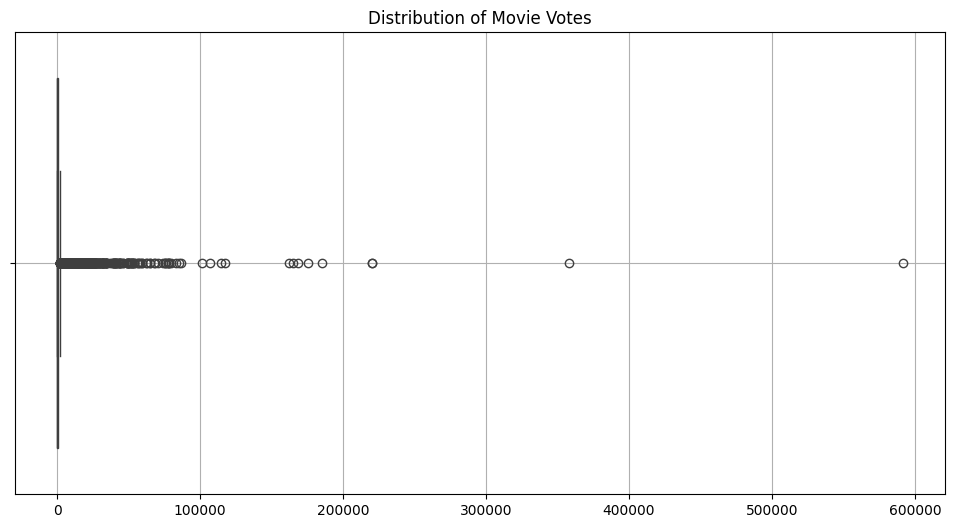

In [110]:
plt.figure(figsize=(12, 6))
#plotting boxplot
sns.boxplot(x=df["Votes"],vert=False,)
plt.title("Distribution of Movie Votes")
plt.xlabel("")
plt.grid(True)
plt.show()

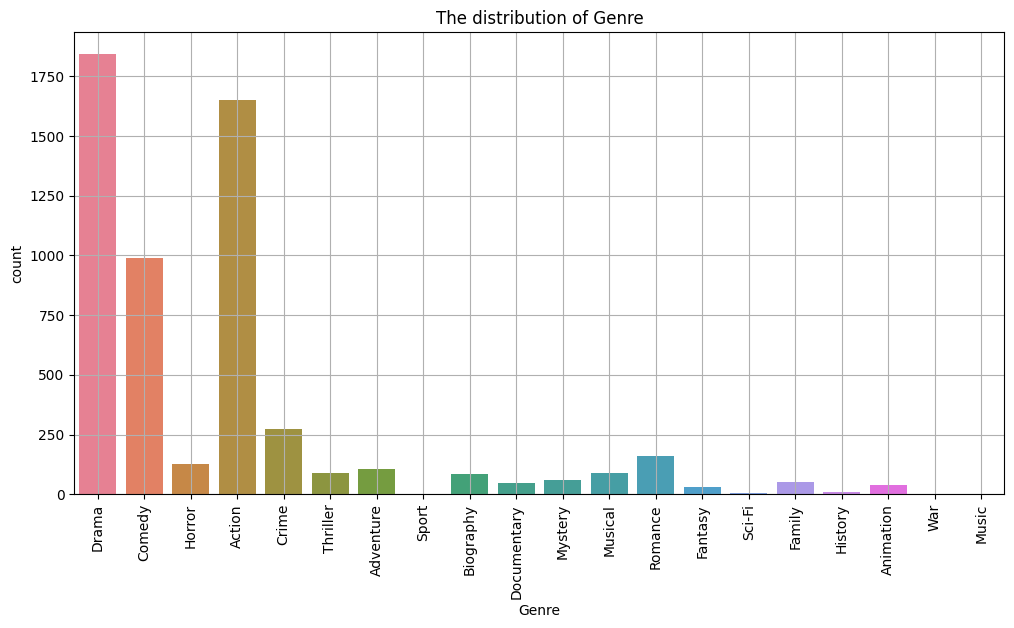

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Genre", data=df,hue="Genre")
plt.title("The distribution of Genre")
plt.grid(True)
plt.xticks(rotation=90);

-**Most of Movies Genre is Drama , Followed by Action**

### Bivariate analysis

In [112]:
average_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()

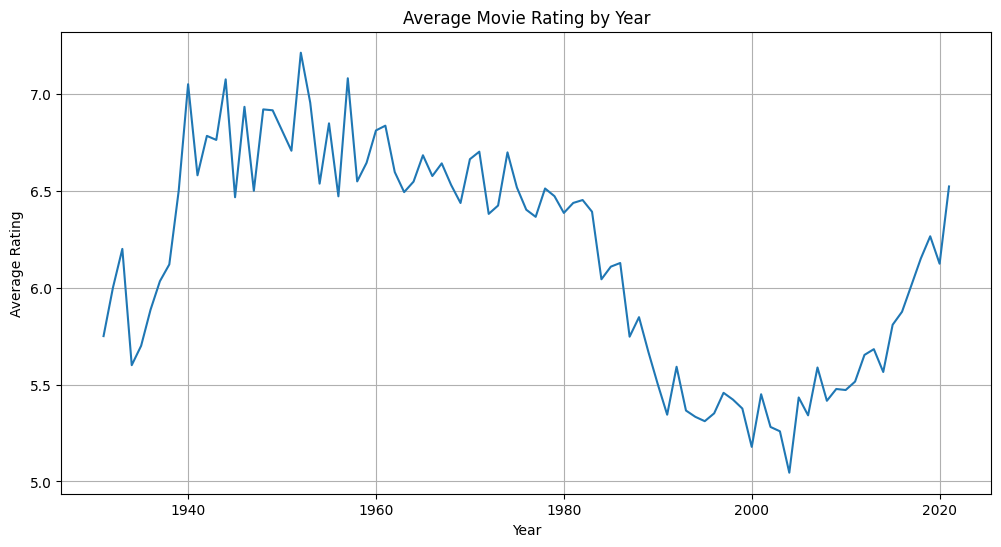

In [113]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_rating_by_year, x="Year", y="Rating")
plt.title("Average Movie Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

- **From 1930 to 1960, movie ratings experienced a steady increase**

- **However, this upward trend reversed from 1960 to 2005, with movie ratings declining over this period**

- **after 2005, movie ratings began to exhibit an upward trajectory once again**

In [114]:
average_Voting_by_year = df.groupby('Year')['Votes'].mean().reset_index()

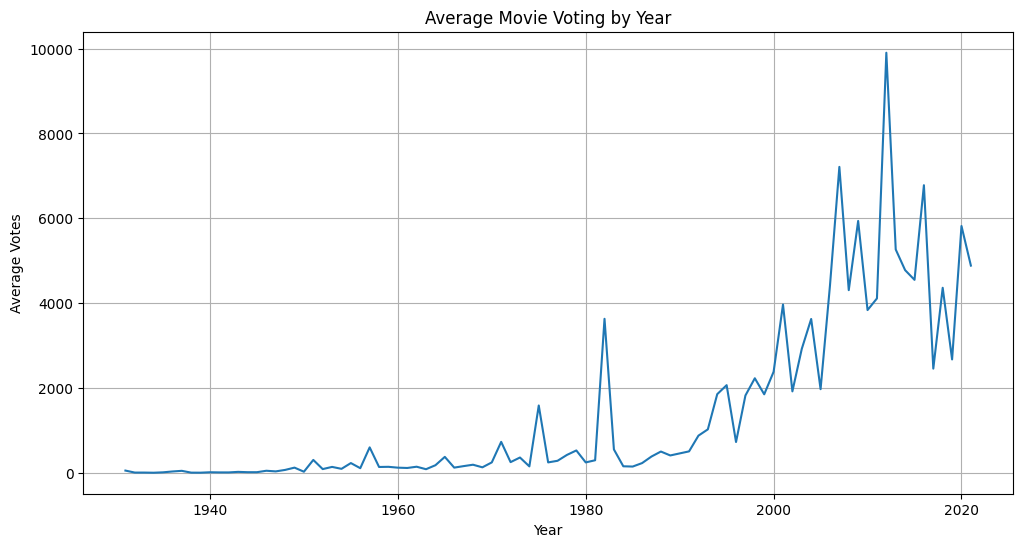

In [115]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_Voting_by_year, x="Year", y="Votes")
plt.title("Average Movie Voting by Year")
plt.xlabel("Year")
plt.ylabel("Average Votes")
plt.grid(True)
plt.show()

- **From 2000 to 2020, movie Votes experienced a steady increase**

In [116]:
average_rating_by_year = df.groupby(['Genre','Year'])['Rating'].mean().reset_index()

In [117]:
top_genre= df['Genre'].value_counts().head(2).index

In [118]:
average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_genre)]

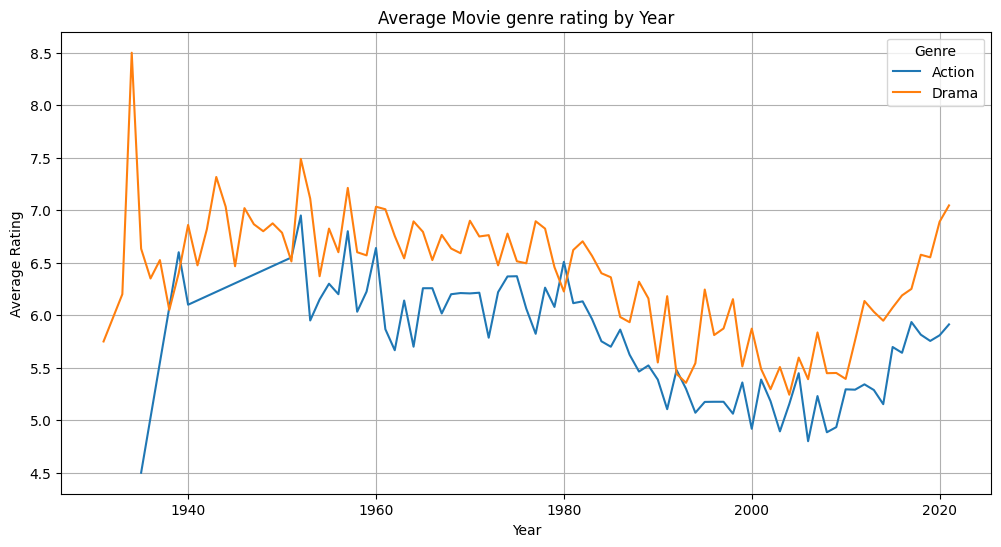

In [119]:
plt.figure(figsize=(12, 6))
sns.lineplot(average_rating_by_year, x="Year", y="Rating",hue='Genre')
plt.title("Average Movie genre rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

- **Drama genre outshines Action genre based on rating on each year**

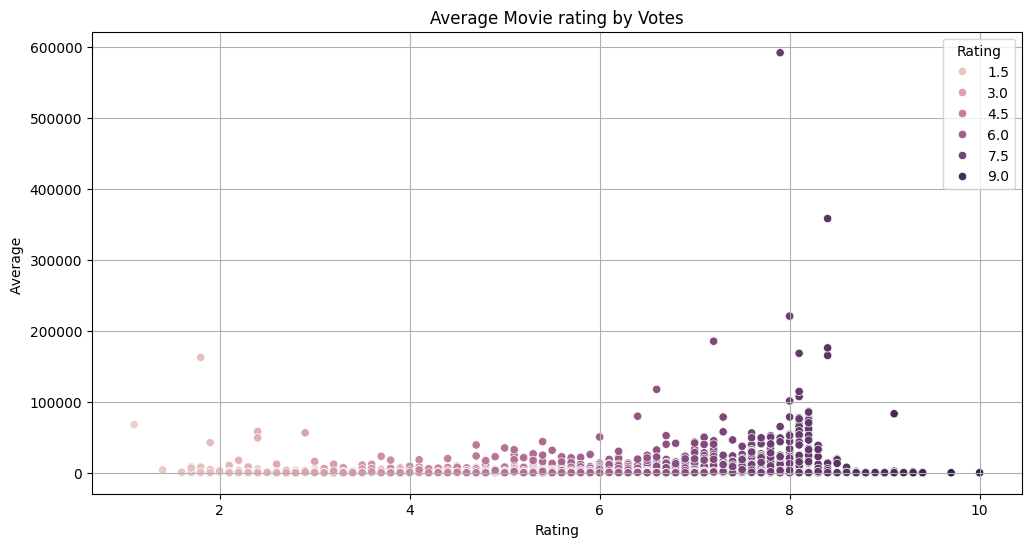

In [120]:
plt.figure(figsize=(12, 6))
sns.scatterplot(df,x="Rating",y='Votes',hue='Rating')
plt.title("Average Movie rating by Votes")
plt.xlabel("Rating")
plt.ylabel("Average ")
plt.grid(True)
plt.show()

-**There is no correlation between Movies Votes and Movie Rating**

In [121]:
print('\n', '='*100, '\n')

##Preprocessing

In [122]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [123]:
#Encoding 'Genre','Director', 'Actor 1','Actor 2', 'Actor 3' columns using Target encoder
df["Genre"]=df.groupby("Genre")["Rating"].transform("mean")
df["Director"]=df.groupby("Director")["Rating"].transform("mean")
df["Actor 1"]=df.groupby("Actor 1")["Rating"].transform("mean")
df["Actor 2"]=df.groupby("Actor 2")["Rating"].transform("mean")
df["Actor 3"]=df.groupby("Actor 3")["Rating"].transform("mean")


In [124]:
#splitting the df into features variables and target variable
X=df.drop('Rating',axis=1)
y=df["Rating"]

In [125]:
#spltting the data into train and test
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=1233)

In [127]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4810, 8), (849, 8), (4810,), (849,))

In [128]:
print('\n', '='*100, '\n')

## Modelling

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
lr=LinearRegression()
rfr=RandomForestRegressor()
tree=DecisionTreeRegressor()


In [130]:
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [131]:
rfr.fit(X_train,y_train)
rfr_pred=rfr.predict(X_test)

In [132]:
tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test)


In [133]:
print('\n', '='*100, '\n')

## Model Evaluation

In [134]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [135]:
print('The performance evaluation of LinearRegression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))

The performance evaluation of LinearRegression is below:  

Mean squared error:  0.439047945898254
Mean absolute error:  0.4897652269323869
R2 score:  0.7872901516211167


In [136]:
print('The performance evaluation of Random Forest Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rfr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rfr_pred))
print('R2 score: ',r2_score(y_test, rfr_pred))

The performance evaluation of Random Forest Regression is below:  

Mean squared error:  0.34122157479387516
Mean absolute error:  0.39612131919905774
R2 score:  0.8346850495120433


In [137]:
print('The performance evaluation of  Decesion tree is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, tree_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, tree_pred))
print('R2 score: ',r2_score(y_test, tree_pred))

The performance evaluation of  Decesion tree is below:  

Mean squared error:  0.6838869257950528
Mean absolute error:  0.549587750294464
R2 score:  0.6686706186574944


In [138]:
print("The best performing model is Random Forest Regressor")
print('\n', '='*100, '\n')

The best performing model is Random Forest Regressor




## Hyperparameter Tuning

In [139]:

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize the Random Forest Regressor
rfr = RandomForestRegressor()

# Define the grid search object
grid_search = GridSearchCV(rfr, param_grid, cv=5,verbose=1)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=1)

In [140]:
gs_pred=grid_search.predict(X_test)

In [141]:
print('The performance evaluation of Random Forest Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, gs_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, gs_pred))
print('R2 score: ',r2_score(y_test, gs_pred))

The performance evaluation of Random Forest Regression is below:  

Mean squared error:  0.3334221530117663
Mean absolute error:  0.39122246642491776
R2 score:  0.8384637115926075


In [142]:
#The model has achieved an accuracy of 84%

## Model Testing

In [143]:
y_preds=grid_search.predict(X_test)

In [144]:
df2=pd.DataFrame({"Actual Rating":y_test,"Predicted Rating":y_preds})

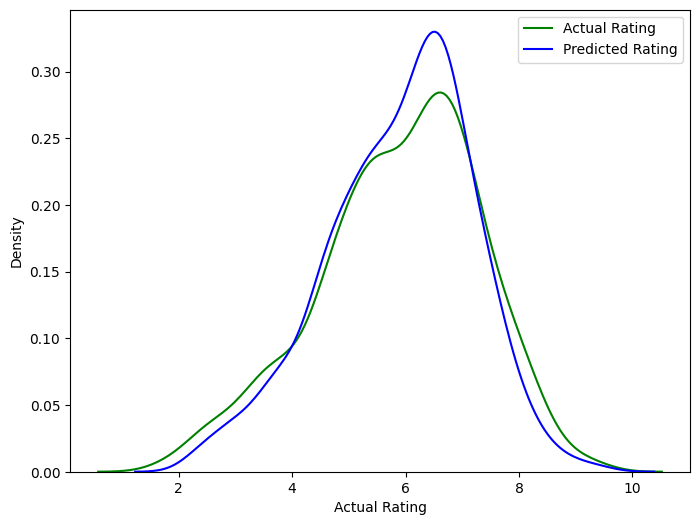

In [145]:
plt.figure(figsize=(8,6))
sns.kdeplot(df2["Actual Rating"],color="green",label="Actual Rating")
sns.kdeplot(df2["Predicted Rating"],color="blue",label="Predicted Rating")
plt.legend();

Text(0, 0.5, 'Predicted Ratings')

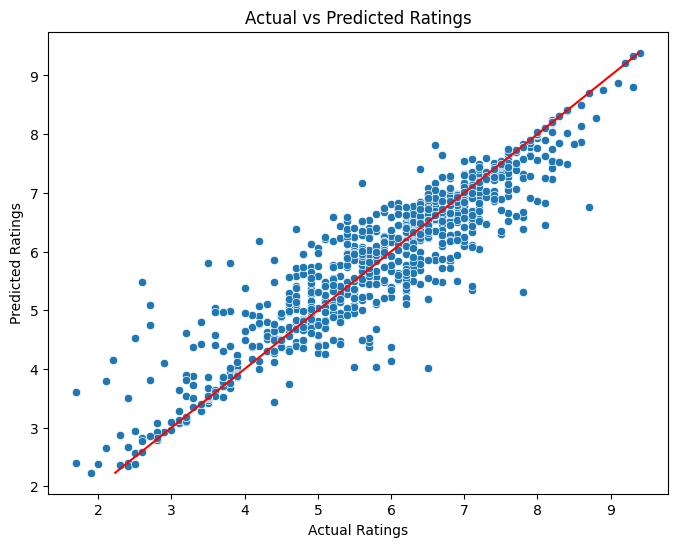

In [146]:
# Scatter plot for Random Forest Regressor predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_preds)
sns.lineplot(x=y_preds, y=y_preds,color='red')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings');
plt.ylabel('Predicted Ratings')

In [147]:
print('\n', '='*60,"END" ,'='*60, '\n')


 ============================================================ END ============================================================ 

